In [27]:
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]



In [28]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader


In [29]:
class MyDataset(Dataset):
    def __init__(self,x,y):
        self.x=torch.tensor(x).float()
        self.y=torch.tensor(y).float()
    def __len__(self):
        return len(self.x)
    def __getitem__(self, index):
        return self.x[index],self.y[index]

In [30]:
ds=MyDataset(x,y)
dl=DataLoader(ds,batch_size=2,shuffle=True)


In [44]:
class Mynetwork(nn.Module):
    def __init__(self,num_features,num_class):
        super().__init__()
        self.layer1=nn.Linear(num_features,100)
        self.layerr=nn.ReLU()
        self.layer2=nn.Linear(100,50)
        self.layer3=nn.Linear(50,num_class)
    
    def forward(self,x):
        x=self.layer1(x)
        x=self.layerr(x)
        x=self.layer2(x)
        x=self.layerr(x)
        x=self.layer3(x)
        return x


In [47]:
model=Mynetwork(2,1)
model.parameters()


<generator object Module.parameters at 0x00000172A7AA84A0>

In [48]:

loss_func=nn.MSELoss()
opt=torch.optim.SGD(model.parameters(),lr=0.001)


In [55]:
loss_history=[]
for _ in range(1000):
    for x,y in dl:
        opt.zero_grad()

        predy=model(x)
        loss_val=loss_func(predy,y)

        loss_val.backward()

        opt.step()
        print(loss_val)
        loss_history.append(loss_val.item())

tensor(7.1179e-05, grad_fn=<MseLossBackward0>)
tensor(0.0001, grad_fn=<MseLossBackward0>)
tensor(4.8718e-05, grad_fn=<MseLossBackward0>)
tensor(0.0001, grad_fn=<MseLossBackward0>)
tensor(0.0001, grad_fn=<MseLossBackward0>)
tensor(0.0002, grad_fn=<MseLossBackward0>)
tensor(0.0001, grad_fn=<MseLossBackward0>)
tensor(7.2709e-05, grad_fn=<MseLossBackward0>)
tensor(8.6917e-05, grad_fn=<MseLossBackward0>)
tensor(0.0002, grad_fn=<MseLossBackward0>)
tensor(0.0002, grad_fn=<MseLossBackward0>)
tensor(0.0002, grad_fn=<MseLossBackward0>)
tensor(8.7981e-05, grad_fn=<MseLossBackward0>)
tensor(9.2096e-05, grad_fn=<MseLossBackward0>)
tensor(6.2591e-05, grad_fn=<MseLossBackward0>)
tensor(8.1962e-05, grad_fn=<MseLossBackward0>)
tensor(6.7734e-05, grad_fn=<MseLossBackward0>)
tensor(7.4705e-05, grad_fn=<MseLossBackward0>)
tensor(6.2962e-05, grad_fn=<MseLossBackward0>)
tensor(0.0002, grad_fn=<MseLossBackward0>)
tensor(0.0001, grad_fn=<MseLossBackward0>)
tensor(0.0001, grad_fn=<MseLossBackward0>)
tensor(6.8

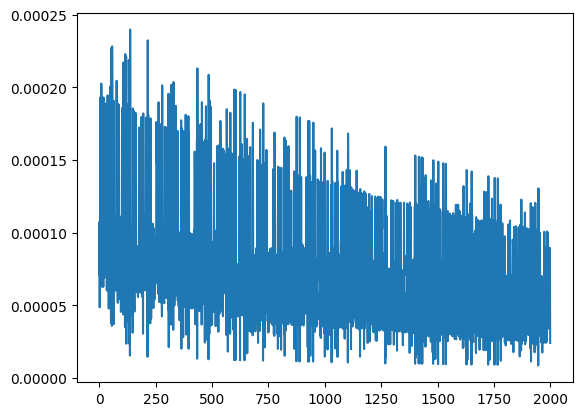

In [56]:
import matplotlib.pyplot as plt
plt.plot(loss_history)

In [59]:
model(torch.tensor([[25,50]]).float())

tensor([[77.0157]], grad_fn=<AddmmBackward0>)